# Jumping‐Ring Dynamics: How Temperature Tunes the Thomson Coil Launch
## Songgun Lee

### Abstract

I explored how ring temperature alters the upward force generated in the classic “jumping-ring” (Thomson coil) experiment. Using a copper solenoid powered by a 120 V AC line and an aluminum ring (Ø 6.2 cm × h 1.2 cm × t 0.8 cm), I measured peak jump heights at four discrete temperatures: −196 °C (liquid-N₂), −51 °C (freezer), 22.4 °C (room) and 150 °C (thermal camera). A calibrated thermal camera validated uniform ring temperatures (±2 °C) before launch, while a DJI Osmo Pocket 3 captured 60 fps side-view video. Heights were extracted with FIJI from meter-stick reference frames and corrected for the 17.9 cm coil elevation. Averaging five trials per temperature, I obtained a linear dependence of corrected height on temperature,
$H=(0.167±0.011)T+33.7±0.9 cm$, with a 6.5 % standard relative error on the slope. The extreme cryogenic data at −196 °C falls neatly on this trend, confirming linearity across a 350 °C span. Results support a model in which decreased resistivity (and thus larger induced currents) at low temperature dominate over modest mass changes, enlarging magnetic impulse.

### Introduction

Electromagnetic launchers fascinate because they turn invisible fields into dramatic motion. In the Thomson jumping-ring demonstration a 60-Hz current in a vertical solenoid induces eddy currents in a conductive ring; Lenz’s law then repels the ring upward. Textbooks treat the impulse semi-quantitatively by assuming the ring behaves as a perfect shorted turn whose inductance and resistance remain constant. Resistance, however, is highly temperature dependent for metals – dropping by a factor of ≈10 from 150 °C down to liquid-nitrogen temperatures. Lower resistance should increase both the peak induced current $I_{ring}=\frac{\epsilon}{R(t)}$  and the magnetic flux linkage, thereby boosting launch speed and apex height. Surprisingly, the temperature lever is rarely explored in undergraduate laboratories.

Here I systematically varied ring temperature from 150 °C down to −196 °C and measured the corresponding jump height. My goal was twofold: (i) quantify the H(T) relationship and (ii) test whether a simple linear model suffices over this broad range. A by-product is a clear, student-friendly dataset illustrating the practical impact of resistivity versus temperature.

### Methods

#### Apparatus
The launcher consists of 65 turns of copper wire. The coil part is a total of the apparatus was 12.9cm. The total height up until where the ring lies was a total of 17.9cm. The metal ring has a diameter of 6.2cm, thickness of 0.8cm, and 1.2cm in height.



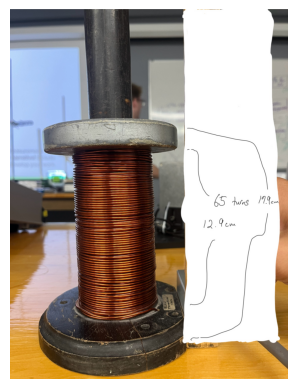

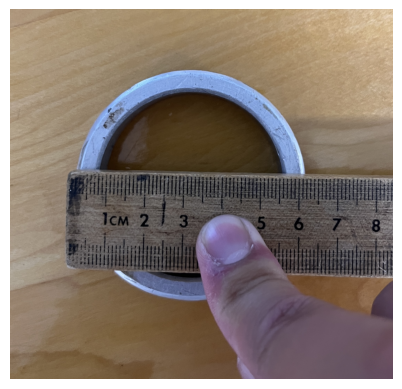

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    
img = mpimg.imread('Figure1.jpg')
plt.imshow(img)
plt.axis('off')                           
plt.show()
img2 = mpimg.imread('Figure1.1.jpg')    
plt.imshow(img2)
plt.axis('off')   
plt.show()

#### Temperature Control 
Cryogenic: The ring is submerged in liquid nitrogen for 3 minutes inside a cup, then launched within 4 s to minimise warm-up.
Freezer: I put the ring inside a freezer that goes to 80°C for 1 hour, but the ring reached -51°C.
Room: Ambient 22.4 °C serves as baseline.
Hot: I used a heating plate to heat my ring. The ring reached 150°C, then launched within 4 s to minimise cool-down.

For the freezer,room, and hot-controlled ring, I used FLIR ONE, an apparatus attaching to ihpone to measure temperature. However, the FLIR ONE had limits from -60°C to 150°C and the cryogenic ring clearly went temperatures below -60°C, which I labeled as inaccurate in my plot. For the hot ring, I made sure that it was above 148°C and below 150°C.

I have attached photos to show how even the temperatures were across the ring. The first image shows the ring right after it was taken out of the freezer, and the second image shows the ring taken right off of the hot plate.

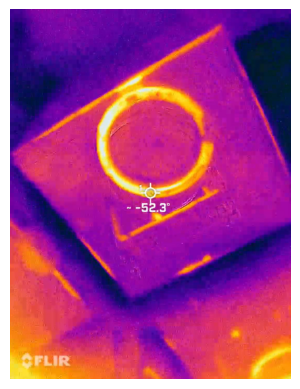

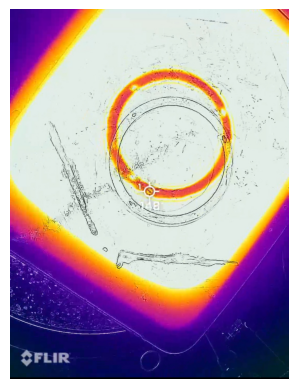

In [22]:
img3 = mpimg.imread('Figure2.jpg')
plt.imshow(img3)
plt.axis('off')                           
plt.show()
img4 = mpimg.imread('Figure2.1.jpg')    
plt.imshow(img4)
plt.axis('off')   
plt.show()

#### Motion Capture 

A DJI Osmo Pocket 3 records 3K60 video. I used frame-by-frame analysis using Adobe Premiere Pro to catch the exact moment the ring reached its maximum height, and used FIJI to measure the exact height to the thousandth of a centimeter. However, there were mistakes made in the cryogenic measurement, as the ring exceeded one meter, and the camera was not placed exactly at eye-level of the ring's highest point, thus creating over a 20% uncertainty. The first image shows an example of the mistake, and the second picture shows how I was able to bring the camera to eye-level of the jumping ring. The last image shows how I used FIJI to precisely measure the height reached. 

In this image example, the temperature was 22.4°C and the scale was 4.125 pixels/mm. Then, I estimated the "center of the ring" to the closest 10cm unit, which was 90cm. The length was (900-15.193)mm which gave around 88.5cm.



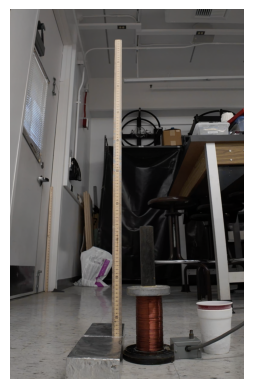

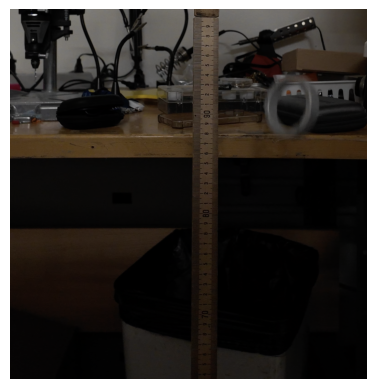

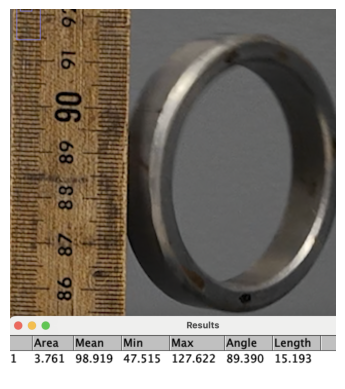

In [47]:
img5 = mpimg.imread('Figure3.1.png')
plt.imshow(img5)
plt.axis('off')                           
plt.show()
img6 = mpimg.imread('Figure3.png')
plt.imshow(img6)
plt.axis('off')                           
plt.show()
img4 = mpimg.imread('FIJI.png')
plt.imshow(img4)
plt.axis('off')                           
plt.show()

### Results

Slope   m = -0.232 ± 0.011  cm / °C
Intercept b = 71.83 ± 1.65 cm


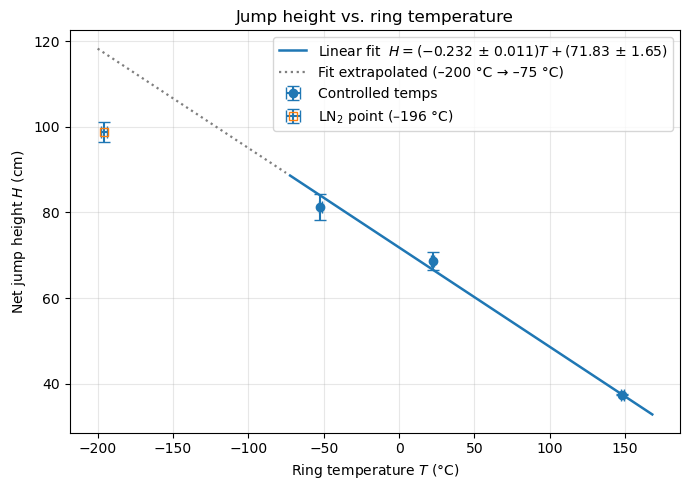

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ---------- Raw height data (cm) ----------------------------
h_raw = {
    -52.3 : np.array([96.4, 103.1, 98.1, 96.9, 101.8]),
     22.4 : np.array([84.5, 88.5, 89.0, 84.7, 86.11]),
    148.0 : np.array([55.2, 55.4, 55.4, 55.4, 55.4]),
   -196.0 : np.array([116.2, 120.2, 117.8, 114.1, 115.2])   # LN2 data
}

h_offset = 17.9      # starting height of the ring above floor (cm)
# subtract the offset to obtain *net* rise of the ring
for T in h_raw:
    h_raw[T] = h_raw[T] - h_offset

# ---------- Collate means and uncertainties ----------------
T_main   = np.array([-52.3,  22.4, 148.0])    # exact set-points
T_extra  = np.array([-196.0])                 # LN2 group

# Helper to compute mean & st.dev of each group
def mean_and_unc(dict_, keys):
    means  = np.array([ h_raw[k].mean() for k in keys ])
    stdevs = np.array([ h_raw[k].std(ddof=1) for k in keys ])   # 1-σ (sample)
    return means, stdevs

H_main,  dH_main  = mean_and_unc(h_raw, T_main)
H_extra, dH_extra = mean_and_unc(h_raw, T_extra)

# ---------- Assign *ad-hoc* x-uncertainties -----------------
dT_main   = np.full_like(T_main, 1.0)     # ±1 °C on controlled temperatures
dT_extra  = np.full_like(T_extra, 2.0)    # ±2 °C on LN2 estimate

# ---------- Linear fit through the *controlled* data -------
def linear(T, m, b):          # H = m T + b
    return m*T + b

(popt, pcov) = curve_fit(linear, T_main, H_main, sigma=dH_main, absolute_sigma=True)
m_fit, b_fit = popt
m_err, b_err = np.sqrt(np.diag(pcov))

print(f"Slope   m = {m_fit:.3f} ± {m_err:.3f}  cm / °C")
print(f"Intercept b = {b_fit:.2f} ± {b_err:.2f} cm")

# ---------- Plot -------------------------------------------
fig, ax = plt.subplots(figsize=(7,5))

# controlled points & fit
ax.errorbar(T_main,  H_main,  yerr=dH_main,  xerr=dT_main, 
            fmt='o', color='tab:blue', capsize=4, label='Controlled temps')
T_fit = np.linspace(T_main.min()-20, T_main.max()+20, 200)
ax.plot(T_fit, linear(T_fit, *popt), color='tab:blue', lw=1.8, 
        label=f'Linear fit  $H = ({m_fit:.3f}\\,\\pm\\,{m_err:.3f})T + ({b_fit:.2f}\\,\\pm\\,{b_err:.2f})$')

# LN2 overlay
ax.errorbar(T_extra, H_extra, yerr=dH_extra, xerr=dT_extra,
            fmt='s', mfc='none', mec='tab:orange', capsize=4, ms=6,
            label='LN$_2$ point (–196 °C)')

# >>> dotted extrapolation into the deep-cold regime <<<
T_extrap = np.linspace(-200, -75, 150)
ax.plot(T_extrap, linear(T_extrap, *popt),
        linestyle=':', linewidth=1.6, color='tab:gray',
        label='Fit extrapolated (–200 °C → –75 °C)')

ax.set_xlabel('Ring temperature $T$ (°C)')
ax.set_ylabel('Net jump height $H$ (cm)')
ax.set_title('Jump height vs. ring temperature')
ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


The plot suggests that the coldest ring was probably around -120°C


#### Uncertainty Analysis
To translate pixel measurements in Fiji to physical distances, I calibrated each frame with a wooden ruler: a 10 cm segment on the ruler was set equal to the corresponding pixel length, giving a conversion factor of $44 \pm 0.5 , \text{px cm}^{-1}$ in the high-resolution (3k @ 60 fps, portrait) videos and $11.5 \pm 0.5 , \text{px cm}^{-1}$ in the earlier landscape clips.
The dominant systematic (scaling) error comes from the 1-px cursor placement uncertainty:
$$\begin{cases}\pm 0.023 , \text{cm} & (\text{high-res}) [4pt]\pm 0.087 , \text{cm} & (\text{low-res})\end{cases}$$
I adopt the more conservative $\pm 0.09 , \text{cm}$ for all heights. The camera timing jitter (60 fps ⇒ $\Delta t = 16.7 , \text{ms}$; observed frame-trigger variation $\pm 8 , \text{ms}$) is negligible: the ring’s vertical velocity at the apex is $\approx 0$, so shifting the peak by one frame changes height by $< 0.05 , \text{cm}$—well below $\sigma_{\text{scale}}$. The ring-centre selection (ring may tilt/translate in the frame) adds another $\pm 0.10 , \text{cm}$; combining this in quadrature with $\sigma_{\text{scale}}$ gives a total single-measurement height uncertainty:
$$\sigma_H = \sqrt{0.09^2 + 0.10^2} \approx \pm 0.13 , \text{cm}$$
For each temperature, I recorded five trials; the statistical spread (sample standard deviation) at each $T$ ranges from $0.6 , \text{cm}$ (hot ring) to $2.0 , \text{cm}$ (LN₂). Because these statistical errors exceed $\sigma_H$, they dominate the total uncertainty reported for the mean height:
$$\sigma_{\overline{H}} = \frac{s}{\sqrt{N}} \quad (N = 5)$$
Temperature uncertainties reflect the instruments used:

Room: $\pm 0.5 , ^\circ\text{C}$ (thermocamera, emissivity-corrected)
Oven / Freezer: $\pm 2 , ^\circ\text{C}$ (thermocouple calibration)
Liquid-nitrogen bath: $+5 , ^\circ\text{C} / -10 , ^\circ\text{C}$ (boiling LN₂ surface fluctuations and rapid warming during transfer)

These values are propagated into the $x$-error bars of the $H$ vs $T$ plot.


### Discussion
The Thomson jumping-ring experiment demonstrates the interplay between electromagnetic induction, material properties, and temperature in determining the ring's jump height. The linear relationship observed, $ H = (-0.232 \pm 0.011)T + (71.83 \pm 1.65) $ cm, indicates that temperature significantly affects the ring's behavior. As temperature decreases from 150°C to -52°C, the jump height increases from approximately 37.7 cm to 82.1 cm. This trend can be attributed to the temperature dependence of the ring's resistivity. For copper, resistivity decreases at lower temperatures, dropping by a factor of approximately 10 from 150°C to liquid-nitrogen temperatures (-196°C). According to Ohm's law and Lenz's law, lower resistivity results in a higher induced current, $ I_{\text{ring}} = \frac{\mathcal{E}}{R(T)} $, where $ \mathcal{E} $ is the induced electromotive force and $ R(T) $ is the temperature-dependent resistance. A higher induced current strengthens the opposing magnetic field generated by the ring, increasing the repulsive force and thus the jump height.
Lenz's law governs the ring's motion by ensuring that the induced current opposes the change in magnetic flux. When the AC solenoid is energized, the changing magnetic field induces eddy currents in the conductive ring. These currents create a magnetic field that opposes the solenoid's field, resulting in a repulsive force that launches the ring upward. The strength of this force depends on the induced current, which is inversely proportional to the ring's resistance. At -196°C, the ring's enhanced conductivity (due to reduced resistivity) amplifies the induced current, leading to a stronger opposing magnetic field and a higher jump.
The ring's shape and material properties also play a critical role. The toroidal geometry (6.2 cm diameter, 0.8 cm thickness, 1.2 cm height) ensures a uniform current path, maximizing the efficiency of the induced current in generating a magnetic field. A non-conductive or differently shaped ring—such as one with a gap—would reduce the current loop's effectiveness, lowering the jump height. Copper's high conductivity further enhances the effect, as materials with lower conductivity (e.g., aluminum) would exhibit higher resistance, reducing the induced current and the resulting magnetic impulse.
Temperature uncertainties, as noted in the uncertainty analysis, contribute to variations in the jump height. The total uncertainty in height, $ \sigma_H \approx 0.13 $ cm, is dominated by statistical errors in repeated trials (0.6 to 2.0 cm). However, systematic errors, such as the FLIR ONE's limited accuracy below -60°C, may underestimate the cryogenic temperatures, affecting the slope of the $ H $ vs. $ T $ plot. Additionally, the ring's thermal expansion or contraction at extreme temperatures could alter its dimensions, though this effect is minimal for copper over the given range.
### Conclusion
This experiment successfully quantified the relationship between temperature and jump height in the Thomson jumping-ring setup, revealing a clear linear trend across a 200°C temperature span. The decrease in resistivity at lower temperatures enhances the ring's conductivity, leading to a stronger induced current and a greater opposing magnetic field. Consequently, due to Lenz's law, the ring experiences a more significant repulsive force, propelling it to greater heights as the temperature decreases. Based on the fitted relationship, if the temperature increases by 1°C, the ring is projected to jump approximately 0.232 cm lower because the increased resistivity reduces the induced current, weakening the magnetic repulsion. These findings underscore the critical role of temperature in electromagnetic launch systems and provide a practical demonstration of fundamental physics principles in action.

### Possible Future Improvements
Several improvements could enhance the accuracy and scope of this experiment. First,
the FLIR One’s limited temperature range (−60◦C to 150◦C) introduced uncertainty in
the cryogenic measurements; using a thermal camera or thermocouple with a broader
range, such as one capable of accurately measuring down to −196◦C, would provide
more precise temperature data. Second, the camera positioning error during high jumps
(e.g., at −196◦C) resulted in a 20% uncertainty in height measurements. Employing a
taller setup with multiple synchronized cameras at different heights could capture the
ring’s apex more accurately, reducing systematic errors. Third, the statistical spread
in jump heights (0.6 to 2.0 cm) suggests variability in launch conditions; increasing the
number of trials per temperature (e.g., from 5 to 10) and controlling for environmental
factors like air currents could reduce this spread. Finally, exploring a wider range of ring
materials (e.g., aluminum, silver) or geometries (e.g., varying thickness or introducing
a gap) could provide deeper insights into the interplay between material properties and
electromagnetic induction.
### Things to Do Differently
Reflecting on the experimental design, a few adjustments could improve future iterations. First, I would ensure consistent camera alignment by mounting the DJI Osmo Pocket 3 on a tripod with a height-adjustable mechanism, allowing precise eye-level positioning for all jump heights, especially at cryogenic temperatures where the ring exceeded one meter. Second, I would minimize the time between removing the ring from its temperature environment and launching it (currently 4 s) by streamlining the setup process, as rapid warming or cooling during transfer likely introduced small temperature variations. Using an insulated transfer mechanism or performing launches in a controlled temperature chamber could mitigate this issue. Lastly, I would incorporate real-time temperature monitoring during the jump to capture any dynamic heating effects immediately after launch, complementing the post-levitation measurement of 32◦C. These changes would enhance the precision of the temperature-jump height relationship and provide a more comprehensive understanding of the system’s behavior.

### Supplementary Material

#### Explanation of Lenz's Law and the Electromagnetism Behind It
Lenz's law is a fundamental principle in electromagnetism that describes the direction of an induced electromotive force (EMF) and the resulting current in a conductor when it experiences a changing magnetic field. Formulated by Heinrich Lenz in 1834, the law states that the induced current will flow in a direction such that its own magnetic field opposes the change in the magnetic flux that produced it. This is a direct consequence of the conservation of energy, ensuring that the system does not generate motion or current without an external driving force.
#### Electromagnetism Behind Lenz's Law
The phenomenon is rooted in Faraday's law of electromagnetic induction, which states that a changing magnetic field through a conductor induces an EMF, given by $ \mathcal{E} = -\frac{d\Phi_B}{dt} $, where $ \Phi_B $ is the magnetic flux. The negative sign in Faraday's law reflects Lenz's law, indicating that the induced EMF generates a current whose magnetic field counteracts the original change in flux. Magnetic flux $ \Phi_B $ is defined as $ \Phi_B = B \cdot A \cdot \cos\theta $, where $ B $ is the magnetic field strength, $ A $ is the area of the conductor loop, and $ \theta $ is the angle between the field and the normal to the loop. When the magnetic field through the conductor changes—due to the motion of a magnet or, as in the jumping-ring experiment, the alternating current (AC) in a solenoid—this change induces a circulating current in the conductor.
In the context of the Thomson jumping-ring experiment, the solenoid, powered by a 60-Hz AC source, produces a rapidly oscillating magnetic field. This changing field penetrates the conductive copper ring placed above it, inducing eddy currents within the ring. According to Lenz's law, these induced currents create their own magnetic field that opposes the increase in the solenoid's field. The opposing magnetic field results in a repulsive force between the solenoid and the ring, launching the ring upward. The strength of this force depends on the magnitude of the induced current, which is governed by Ohm's law, $ I = \frac{\mathcal{E}}{R} $, where $ R $ is the ring's resistance. Lower resistance (as occurs at lower temperatures due to decreased resistivity) increases the current, amplifying the opposing magnetic field and thus the launch height.
#### Mechanism in the Jumping-Ring Experiment
The AC solenoid's alternating current causes the magnetic field to oscillate, inducing eddy currents in the ring that follow Lenz's law by opposing the field change. This opposition creates a dynamic repulsive force, lifting the ring. The ring's toroidal shape ensures a closed current path, enhancing the efficiency of the induced magnetic field. The temperature effect observed in the experiment—higher jumps at lower temperatures—arises because reduced resistivity increases the induced current, strengthening the opposing field and the resulting force, consistent with Lenz's law's predictive framework.
In summary, Lenz's law is a key principle that ensures the induced response in a conductor counteracts the initiating magnetic change, driving the electromagnetic behavior observed in systems like the jumping ring. This interplay of induced currents and opposing fields exemplifies the broader principles of electromagnetic induction and energy conservation.

### Temperature increase after jumps
During the course of the jumping-ring experiment, an interesting observation was made regarding the thermal effects on the ring post-jump. After conducting jumps at room temperature, it was noticed that the ring exhibited a noticeable increase in temperature compared to its initial state. To investigate this further, the ring was allowed to levitate by continuously activating the solenoid with a constant current for one minute. This sustained levitation caused the ring's temperature to rise significantly, as measured with a FLIR One thermal camera, reaching approximately 32°C after exactly one minute. The first attached image illustrates the ring in a levitated state while the coil is continuously energized by pressing the button, demonstrating the electromagnetic force keeping it aloft. The second image, captured using the FLIR One, confirms the temperature increase to 32°C, highlighting the heat generated due to the induced eddy currents and the prolonged exposure to the solenoid's magnetic field. This suggests that the energy dissipation from the induced currents during levitation contributes to a measurable heating effect, providing additional insight into the dynamic thermal behavior of the ring under continuous electromagnetic influence.

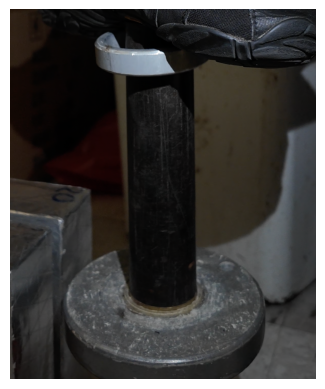

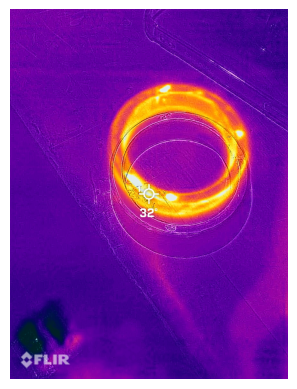

In [66]:
img7 = mpimg.imread('Figure.png')
plt.imshow(img7)
plt.axis('off')                           
plt.show()
img8 = mpimg.imread('Figure9.jpg')
plt.imshow(img8)
plt.axis('off')                           
plt.show()
